<a href="https://colab.research.google.com/github/AkashBhardwaj9078/ML-applications/blob/main/DairyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [ ]:
numeric_df=df.select_dtypes("float64","int64")
x=numeric_df.drop(["Approx. Total Revenue(INR)"],axis=1)
y=numeric_df['Approx. Total Revenue(INR)']


In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

xtr,xts,ytr,yts=train_test_split(x,y,random_state=0)


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
rf=RandomForestRegressor()
rf.fit(xtr,ytr)
rpred=rf.predict(xts)
print("Random_Forest_Regressor")
print("r2_score :",r2_score(yts,rpred))
print("mean_absolute_error :",mean_absolute_error(rpred,yts))
print("mean_squared_error :",mean_squared_error(rpred,yts))





Random_Forest_Regressor
r2_score : 0.44252023870855905
mean_absolute_error : 7100.611738817005
mean_squared_error : 110875895.899098


In [ ]:
ad=AdaBoostRegressor()

ad.fit(xtr,ytr)
rpred=ad.predict(xts)
print("AdaBoost_Regressor")
print("r2_score :",r2_score(yts,rpred))
print("mean_absolute_error :",mean_absolute_error(rpred,yts))
print("mean_squared_error :",mean_squared_error(rpred,yts))

AdaBoost_Regressor
r2_score : 0.48169930790338
mean_absolute_error : 7168.176923609557
mean_squared_error : 103083658.94433339


In [ ]:
rf.get_params()
rfparams={'ccp_alpha':[0,10,20,50],"max_features":[10,15],"max_leaf_nodes":[6,12,20]}
rfgrid=GridSearchCV(rf,rfparams,cv=KFold(5))
rpred=rfgrid.fit(xtr,ytr).predict(xts)
print("Random_Forest_Regressor")
print("r2_score :",r2_score(yts,rpred))
print("mean_absolute_error :",mean_absolute_error(rpred,yts))
print("mean_squared_error :",mean_squared_error(rpred,yts))
print("the best parameters ",rfgrid.best_params_)
print("the score  ",rfgrid.best_score_)

Random_Forest_Regressor
r2_score : 0.4685545854727652
mean_absolute_error : 7044.068193740308
mean_squared_error : 105697983.22484744
the best parameters  {'ccp_alpha': 20, 'max_features': 15, 'max_leaf_nodes': 20}
the score   0.5091661484173896


In [ ]:
ad.get_params()
adparams={"learning_rate":[3e2,7e1,4e-2,],"n_estimators":[3,8,12,20]}
adgrid=GridSearchCV(ad,adparams,cv=KFold(5))
adpred=adgrid.fit(xtr,ytr).predict(xts)
print("AdaBoost_Regressor")
print("r2_score :",r2_score(yts,adpred))
print("mean_absolute_error :",mean_absolute_error(adpred,yts))
print("mean_squared_error :",mean_squared_error(adpred,yts))
print("the best parameters ",adgrid.best_params_)
print("the score  ",adgrid.best_score_)


AdaBoost_Regressor
r2_score : 0.4925152724788816
mean_absolute_error : 6967.193442218291
mean_squared_error : 100932496.07602845
the best parameters  {'learning_rate': 0.04, 'n_estimators': 12}
the score   0.5109584284331766


In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score
print("cross_validation_score of Random_Forest_Regressor :",np.mean(cross_val_score(rf,xtr,ytr,cv=KFold(6),verbose=2)))
print("cross_validation_score of AdaBoost_Regressor :",np.mean(cross_val_score(ad,xtr,ytr,cv=KFold(6),verbose=2)))

[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   1.7s
[CV] END .................................................... total time=   2.1s
[CV] END .................................................... total time=   2.5s
cross_validation_score of Random_Forest_Regressor 0.4738192526132961
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END ...............................

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
x=numeric_df
y=df['Product Name']

xtr,xts,ytr,yts=train_test_split(x,y,random_state=0,test_size=0.6)





In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
pred=KNeighborsClassifier().fit(xtr,ytr).predict(xts)
print("accuracy score ",accuracy_score(pred,yts))
confusion_matrix(pred,yts)

accuracy score  0.0928709055876686


array([[58, 53, 49, 53, 50, 44, 49, 60, 59, 56],
       [45, 48, 45, 63, 43, 61, 65, 44, 44, 43],
       [26, 24, 14, 22, 24, 36, 23, 19, 29, 24],
       [32, 35, 31, 28, 22, 17, 24, 24, 25, 31],
       [21, 11, 24, 27, 17, 13, 18, 24, 21, 17],
       [14, 11, 17, 15, 26, 13, 24, 18, 23, 29],
       [18, 17, 20, 23, 23,  9, 20, 18, 13, 18],
       [18, 16, 16, 18, 10, 24, 21, 18, 19, 15],
       [11, 12, 19, 20, 11, 18, 11, 11, 15, 11],
       [18, 15, 15, 20, 27, 20, 13, 16, 23, 10]])

In [ ]:
print("cross_validation_scores:",cross_val_score(KNeighborsClassifier(),xtr,ytr,cv=KFold(8),verbose=2))
print("mean_cross_validation_score:",np.mean(cross_val_score(KNeighborsClassifier(),xtr,ytr,cv=KFold(8),verbose=2)))


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
cross_validation_scores: [0.08294931 0.09677419 0.08796296 0.13425926 0.09722222 0.13888889
 0.11111111 0.11111111]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time= 

In [ ]:
mod=DecisionTreeClassifier()
pred=mod.fit(xtr,ytr).predict(xts)
print("accuracy score ",accuracy_score(pred,yts))
confusion_matrix(pred,yts)

accuracy score  0.09556840077071291


array([[25, 25, 32, 21, 28, 22, 24, 23, 24, 26],
       [22, 26, 28, 40, 28, 29, 33, 18, 27, 24],
       [23, 19, 20, 30, 21, 22, 14, 28, 31, 31],
       [29, 27, 25, 31, 26, 27, 33, 34, 22, 30],
       [17, 23, 17, 25, 24, 23, 12, 16, 16, 20],
       [26, 20, 36, 25, 22, 15, 30, 30, 26, 21],
       [23, 18, 23, 22, 29, 28, 24, 26, 30, 22],
       [30, 34, 25, 31, 19, 31, 35, 26, 34, 31],
       [34, 22, 17, 40, 29, 24, 30, 28, 34, 26],
       [32, 28, 27, 24, 27, 34, 33, 23, 27, 23]])

[Text(0.6206207211279962, 0.9864864864864865, 'x[2] <= 92.69\ngini = 0.899\nsamples = 1730\nvalue = [170, 193, 151, 190, 149, 168, 179, 177, 170, 183]'),
 Text(0.2720544988698089, 0.9594594594594594, 'x[1] <= 205.39\ngini = 0.899\nsamples = 1584\nvalue = [147, 185, 142, 175, 137, 160, 161, 147, 159, 171]'),
 Text(0.13134669124351284, 0.9324324324324325, 'x[0] <= 973.9\ngini = 0.889\nsamples = 298\nvalue = [21, 51, 15, 30, 27, 21, 26, 37, 38, 32]'),
 Text(0.1015113281846812, 0.9054054054054054, 'x[7] <= 195.365\ngini = 0.889\nsamples = 286\nvalue = [21, 51, 14, 30, 26, 21, 26, 35, 34, 28]'),
 Text(0.046887398287834954, 0.8783783783783784, 'x[1] <= 34.915\ngini = 0.889\nsamples = 276\nvalue = [21, 50, 13, 29, 25, 21, 25, 30, 34, 28]'),
 Text(0.02247401442082592, 0.8513513513513513, 'x[1] <= 31.415\ngini = 0.873\nsamples = 50\nvalue = [3, 6, 7, 8, 3, 4, 1, 7, 2, 9]'),
 Text(0.015613525808152744, 0.8243243243243243, 'x[6] <= 25.755\ngini = 0.867\nsamples = 42\nvalue = [3, 6, 3, 5, 2, 4, 1,

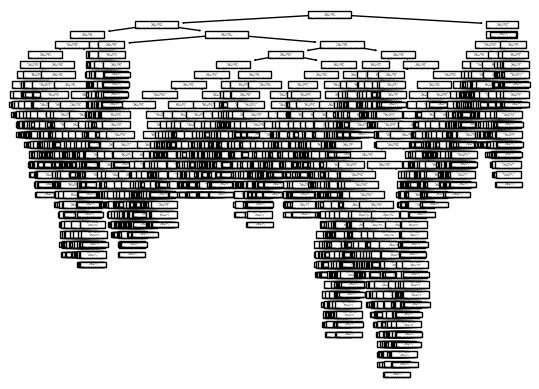

In [ ]:
plot_tree(mod)

In [ ]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84
